# ECO2AI Carbon Emisssion Tracker

In this notebook we learn about how to use ECO2AI Carbon Emission tracker to compute the emissions in the overall training process on an MNSIT dataset.

Here we have used Convolutional Deep Neural Network with BatchNormalization and MaxPooling2D. The objective is to study Number of epochs, training start_time, duration(s),	power_consumption(kWh),	CO2_emissions(kg) on what	CPU/GPU the model has ran as well as the underlying OS.

Number of epochs right now is not implemented inside the library for the initial run, which in the notebook has been handled by passing in total_epochs in the Tracker constructor and likewise handled inside the library.

In [1]:
import eco2ai
from eco2ai import track

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import random
from PIL import Image
import os

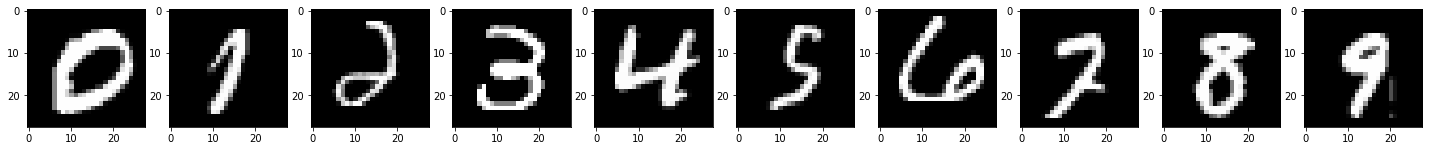

In [2]:
#Prepearing Mnist Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) 
for i in range(10): 
    label_indexes = np.where(y_train==i)[0] 
    index = random.choice(label_indexes) 
    img = x_train[index] 
    axs[i].imshow(Image.fromarray(img), cmap='gray') 

plt.show() 

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Epoch 1/12
235/235 [==============================] - 25s 108ms/step - loss: 0.4778 - accuracy: 0.8501 - val_loss: 0.0988 - val_accuracy: 0.9705
Epoch 2/12
235/235 [==============================] - 23s 100ms/step - loss: 0.1637 - accuracy: 0.9508 - val_loss: 0.0679 - val_accuracy: 0.9788
Epoch 3/12
235/235 [==============================] - 22s 93ms/step - loss: 0.1207 - accuracy: 0.9627 - val_loss: 0.0548 - val_accuracy: 0.9831
Epoch 4/12
235/235 [==============================] - 25s 107ms/step - loss: 0.1021 - accuracy: 0.9692 - val_loss: 0.0495 - val_accuracy: 0.9824
Epoch 5/12
235/235 [==============================] - 25s 104ms/step - loss: 0.0908 - accuracy: 0.9724 - val_loss: 0.0448 - val_accuracy: 0.9848
Epoch 6/12
235/235 [==============================] - 21s 91ms/step - loss: 0.0834 - accuracy: 0.9749 - val_loss: 0.0405 - val_accuracy: 0.9861
Epoch 7/12
235/235 [==============================] - 22s 92ms/step - loss: 0.0748 - accuracy: 0.9764 - val_loss: 0.0408 - val_accur

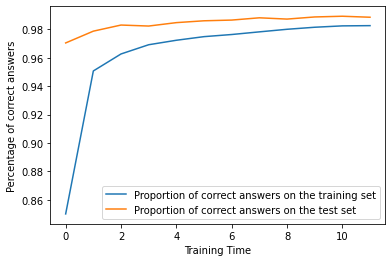

In [3]:
import warnings
warnings.filterwarnings('ignore')
total_epochs = 12 

#Creating tracker object
tracker = eco2ai.Tracker(project_name="mnist", experiment_description="Convolutional model", total_epochs = total_epochs)
#start command
tracker.start()

batch_size = 256 

model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=total_epochs, validation_data=(x_test, y_test),verbose=1)

plt.plot(history.history['accuracy'], 
         label='Proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='Proportion of correct answers on the test set')
plt.xlabel('Training Time')
plt.ylabel('Percentage of correct answers')
plt.legend()
plt.show()


#end command
tracker.stop()

In [4]:
#checking results
df = pd.read_csv('emission.csv',sep =',')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,55c92fa9-3961-4d88-9102-2f447c413665,mnist,Convolutional model,12,2023-01-19 13:03:58,279.083063,0.000977,0.000611,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz/1 dev...,0 device(s),MacOS,IN/Karnataka,NaN


Epoch 1/12
235/235 [==============================] - 8s 32ms/step - loss: 0.2961 - accuracy: 0.9142 - val_loss: 0.1492 - val_accuracy: 0.9563
Epoch 2/12
235/235 [==============================] - 7s 32ms/step - loss: 0.1059 - accuracy: 0.9699 - val_loss: 0.0817 - val_accuracy: 0.9752
Epoch 3/12
235/235 [==============================] - 7s 32ms/step - loss: 0.0674 - accuracy: 0.9803 - val_loss: 0.0661 - val_accuracy: 0.9799
Epoch 4/12
235/235 [==============================] - 8s 35ms/step - loss: 0.0504 - accuracy: 0.9851 - val_loss: 0.0665 - val_accuracy: 0.9797
Epoch 5/12
235/235 [==============================] - 8s 32ms/step - loss: 0.0398 - accuracy: 0.9878 - val_loss: 0.0606 - val_accuracy: 0.9805
Epoch 6/12
235/235 [==============================] - 8s 33ms/step - loss: 0.0333 - accuracy: 0.9903 - val_loss: 0.0597 - val_accuracy: 0.9810
Epoch 7/12
235/235 [==============================] - 7s 31ms/step - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.0686 - val_accuracy: 0.9807

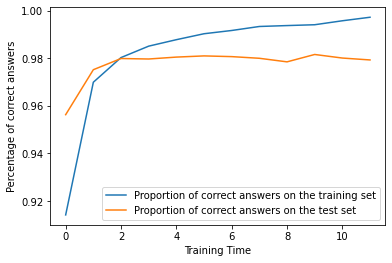

In [5]:
warnings.filterwarnings('ignore')

#Creating tracker object
tracker = eco2ai.Tracker(project_name="mnist", experiment_description="simple model", total_epochs = total_epochs)
#start command
tracker.start()

batch_size = 256 

model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=total_epochs, validation_data=(x_test, y_test),verbose=1)

plt.plot(history.history['accuracy'], 
         label='Proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='Proportion of correct answers on the test set')
plt.xlabel('Training Time')
plt.ylabel('Percentage of correct answers')
plt.legend()
plt.show()


#end command
tracker.stop()

In [6]:
#checking results
df = pd.read_csv('emission.csv',sep =',')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,55c92fa9-3961-4d88-9102-2f447c413665,mnist,Convolutional model,12,2023-01-19 13:03:58,279.083063,0.000977,0.000611,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz/1 dev...,0 device(s),MacOS,IN/Karnataka,NaN
1,935c05eb-e754-4f30-af39-6f0b1d04445b,mnist,simple model,12,2023-01-19 13:08:39,91.439476,0.000280,0.000175,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz/1 dev...,0 device(s),MacOS,IN/Karnataka,NaN


Epoch 1/12
235/235 [==============================] - 7s 30ms/step - loss: 0.2945 - accuracy: 0.9148 - val_loss: 0.1559 - val_accuracy: 0.9516
Epoch 2/12
235/235 [==============================] - 7s 30ms/step - loss: 0.1070 - accuracy: 0.9693 - val_loss: 0.0873 - val_accuracy: 0.9745
Epoch 3/12
235/235 [==============================] - 7s 29ms/step - loss: 0.0718 - accuracy: 0.9793 - val_loss: 0.0836 - val_accuracy: 0.9745
Epoch 4/12
235/235 [==============================] - 7s 31ms/step - loss: 0.0553 - accuracy: 0.9837 - val_loss: 0.0717 - val_accuracy: 0.9780
Epoch 5/12
235/235 [==============================] - 7s 31ms/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0731 - val_accuracy: 0.9774
Epoch 6/12
235/235 [==============================] - 7s 31ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.0660 - val_accuracy: 0.9802
Epoch 7/12
235/235 [==============================] - 8s 33ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0749 - val_accuracy: 0.9769

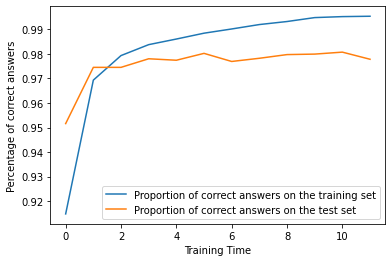

In [7]:
warnings.filterwarnings('ignore')

#Creating tracker object
tracker = eco2ai.Tracker(project_name="mnist", experiment_description="simple model", total_epochs = total_epochs)
#start command
tracker.start()

batch_size = 256 

model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=total_epochs, validation_data=(x_test, y_test),verbose=1)

plt.plot(history.history['accuracy'], 
         label='Proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='Proportion of correct answers on the test set')
plt.xlabel('Training Time')
plt.ylabel('Percentage of correct answers')
plt.legend()
plt.show()

#end command
tracker.stop()

In [8]:
#checking results
df = pd.read_csv('emission.csv',sep =',')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,55c92fa9-3961-4d88-9102-2f447c413665,mnist,Convolutional model,12,2023-01-19 13:03:58,279.083063,0.000977,0.000611,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz/1 dev...,0 device(s),MacOS,IN/Karnataka,NaN
1,935c05eb-e754-4f30-af39-6f0b1d04445b,mnist,simple model,12,2023-01-19 13:08:39,91.439476,0.000280,0.000175,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz/1 dev...,0 device(s),MacOS,IN/Karnataka,NaN
2,6d482a41-2ece-48ad-80c3-6e7384f0d506,mnist,simple model,12,2023-01-19 13:10:13,91.558692,0.000291,0.000182,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz/1 dev...,0 device(s),MacOS,IN/Karnataka,NaN


Epoch 1/12
235/235 [==============================] - 8s 32ms/step - loss: 0.3039 - accuracy: 0.9135 - val_loss: 0.1454 - val_accuracy: 0.9588
Epoch 2/12
235/235 [==============================] - 7s 32ms/step - loss: 0.1139 - accuracy: 0.9683 - val_loss: 0.0915 - val_accuracy: 0.9734
Epoch 3/12
235/235 [==============================] - 7s 31ms/step - loss: 0.0723 - accuracy: 0.9788 - val_loss: 0.0737 - val_accuracy: 0.9772
Epoch 4/12
235/235 [==============================] - 8s 33ms/step - loss: 0.0557 - accuracy: 0.9834 - val_loss: 0.0675 - val_accuracy: 0.9792
Epoch 5/12
235/235 [==============================] - 7s 32ms/step - loss: 0.0431 - accuracy: 0.9873 - val_loss: 0.0685 - val_accuracy: 0.9788
Epoch 6/12
235/235 [==============================] - 7s 30ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0681 - val_accuracy: 0.9786
Epoch 7/12
235/235 [==============================] - 7s 29ms/step - loss: 0.0283 - accuracy: 0.9914 - val_loss: 0.0694 - val_accuracy: 0.9797

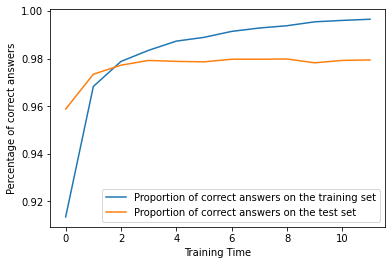

In [10]:
warnings.filterwarnings('ignore')

#Creating tracker object
tracker = eco2ai.Tracker(
    project_name="Mnist, testing decorators", 
    experiment_description="simple model",
    file_name="emission.csv",
    total_epochs = total_epochs
    )

#using decorators
@track
def train_func():
    batch_size = 256 

    model = Sequential()
    model.add(BatchNormalization(input_shape=(28, 28, 1)))
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=total_epochs, validation_data=(x_test, y_test),verbose=1)

    plt.plot(history.history['accuracy'], 
             label='Proportion of correct answers on the training set')
    plt.plot(history.history['val_accuracy'], 
             label='Proportion of correct answers on the test set')
    plt.xlabel('Training Time')
    plt.ylabel('Percentage of correct answers')
    plt.legend()
    plt.show()



train_func()

In [11]:
#checking results
df = pd.read_csv('emission.csv',sep =',')
df

,id,project_name,experiment_description,epoch,start_time,duration(s),power_consumption(kWh),CO2_emissions(kg),CPU_name,GPU_name,OS,region/country,cost
0,55c92fa9-3961-4d88-9102-2f447c413665,mnist,Convolutional model,12,2023-01-19 13:03:58,279.083063,0.000977,0.000611,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz/1 dev...,0 device(s),MacOS,IN/Karnataka,NaN
1,935c05eb-e754-4f30-af39-6f0b1d04445b,mnist,simple model,12,2023-01-19 13:08:39,91.439476,0.000280,0.000175,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz/1 dev...,0 device(s),MacOS,IN/Karnataka,NaN
2,6d482a41-2ece-48ad-80c3-6e7384f0d506,mnist,simple model,12,2023-01-19 13:10:13,91.558692,0.000291,0.000182,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz/1 dev...,0 device(s),MacOS,IN/Karnataka,NaN
3,bc46a450-902e-42d6-ad6f-8414b3ee0754,"Mnist, testing decorators",simple model,10,2023-01-19 13:14:00,94.242969,0.000348,0.000218,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz/1 dev...,0 device(s),MacOS,IN/Karnataka,NaN
